<a href="https://colab.research.google.com/github/Omarsesa/Lablab/blob/main/in_painting_with_stable_diffusion_using_%F0%9F%A7%A8diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prompt Inpainting with Stable Diffusion

In [ ]:
!pip install -qq -U diffusers==0.6.0 transformers ftfy gradio
!pip install git+https://github.com/huggingface/diffusers.git

     |████████████████████████████████| 255 kB 11.0 MB/s 
     |████████████████████████████████| 5.5 MB 23.6 MB/s 
     |████████████████████████████████| 53 kB 814 kB/s 
     |████████████████████████████████| 11.6 MB 34.9 MB/s 
     |████████████████████████████████| 163 kB 33.5 MB/s 
     |████████████████████████████████| 7.6 MB 59.8 MB/s 
     |████████████████████████████████| 56 kB 3.2 MB/s 
     |████████████████████████████████| 84 kB 2.4 MB/s 
     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 106 kB 21.4 MB/s 
     |████████████████████████████████| 84 kB 921 kB/s 
     |████████████████████████████████| 213 kB 35.1 MB/s 
     |████████████████████████████████| 272 kB 60.5 MB/s 
     |████████████████████████████████| 2.3 MB 56.9 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 63 kB 930 kB/s 
     |████████████████████████████████| 80 kB 10.8 MB/s 
     |██████████████████████

First , in order to use the model, you need to accept the model license before downloading or using the weights. In this post we'll use `runwayml/stable-diffusion-inpainting` model released by Runwayml so you'll need to  visit [its card](https://huggingface.co/runwayml/stable-diffusion-inpainting), read the license and tick the checkbox if you agree. 

You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work. For more information on access tokens, please refer to [this section of the documentation](https://huggingface.co/docs/hub/security-tokens).

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

import necessary libs

In [ ]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch

import PIL
import gradio as gr
from diffusers import StableDiffusionInpaintPipeline

intialize the module

In [ ]:
device = "cuda"
model_path = "runwayml/stable-diffusion-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
).to(device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

# download the images 

In [ ]:
import requests
from io import BytesIO

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://raw.githubusercontent.com/andreasjansson/cog-stable-diffusion-inpainting/master/desktop.jpg"
mask_url = "https://raw.githubusercontent.com/andreasjansson/cog-stable-diffusion-inpainting/master/desktop-mask.jpg"

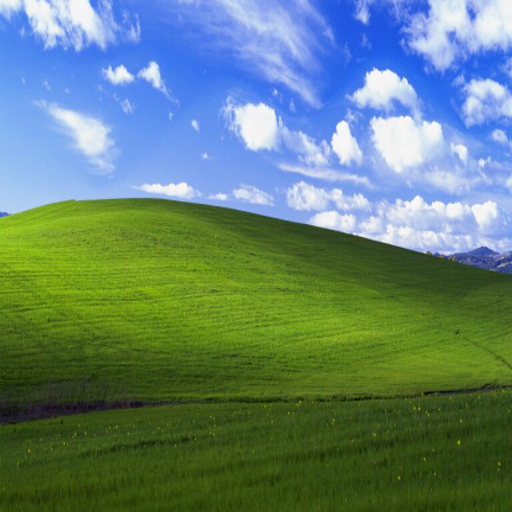

In [ ]:
image = download_image(img_url).resize((512, 512))
image

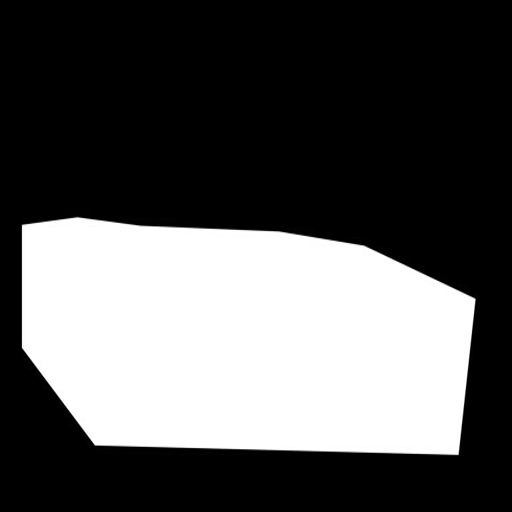

In [ ]:
mask_image = download_image(mask_url).resize((512, 512))
mask_image

# image generation

In [ ]:
prompt = "HOUSE  on a hill"

guidance_scale=7.5
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# insert initial image in the list so we can compare side by side
images.insert(0, image)

Visualize images

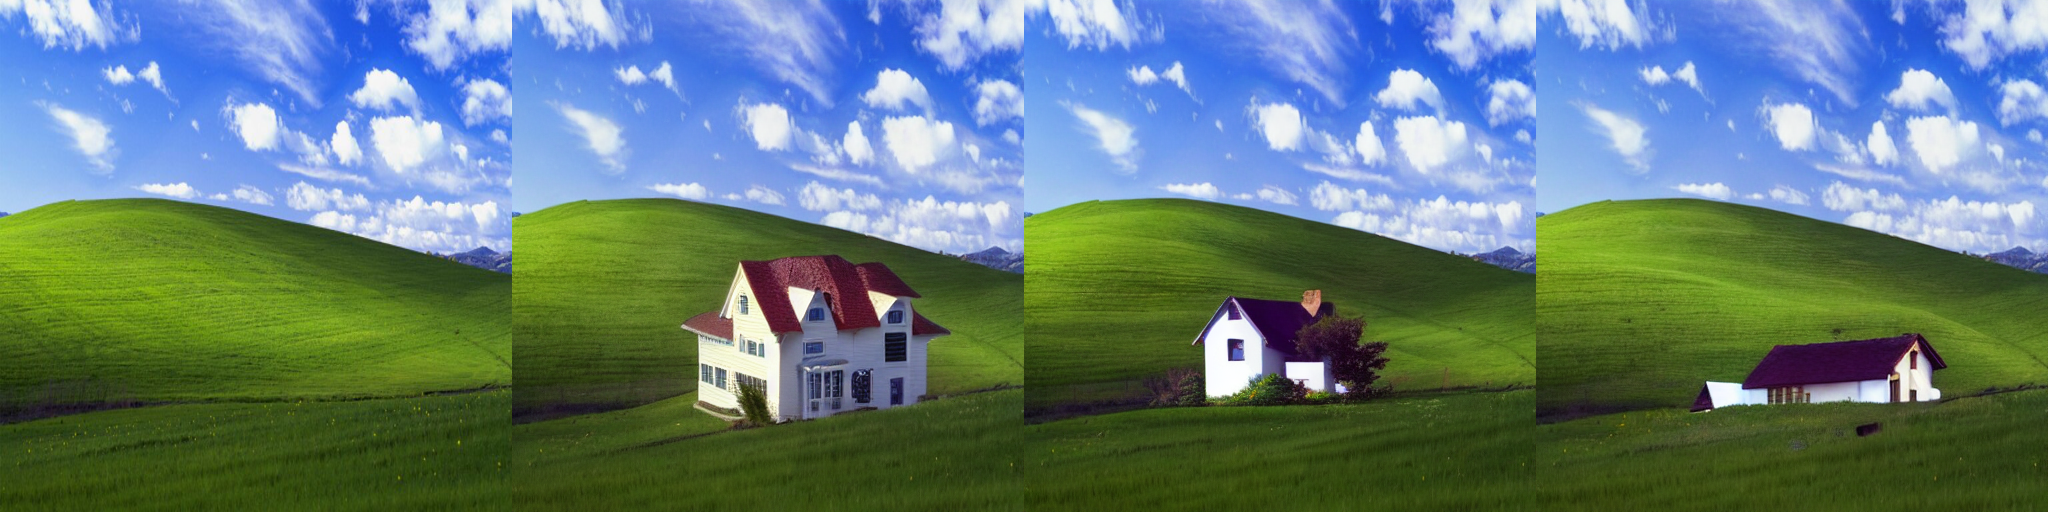

In [ ]:
image_grid(images, 1, num_samples + 1)